## 차원 축소

!! 이 파일에 작성하지 마시고 복제해서 써주세요 !!

실습 과정을 따라하면서 빈칸을 채워주세요 :)

#### 1. PCA

In [1]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 2. 데이터 불러오기 및 정규화
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

🔎 Quiz 1: PCA 진행 시 왜 스케일링 할까요?

답: PCA는 데이터의 분산이 가장 큰 방향으로 수행하게 되는데, 만약 변수들의 단위나 범위가 다르다면 특정 변수는 반영이 안되어서 결과가 왜곡될 수 있습니다. 따라서 특정 변수에 치우치지 않고 전체 데이터의 패턴을 잘 반영하기 위해 스케일링이 필요합니다.

In [3]:
# 3. PCA 적용
# 기존의 4차원 데이터를 2차원 데이터로 축소해주세요.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


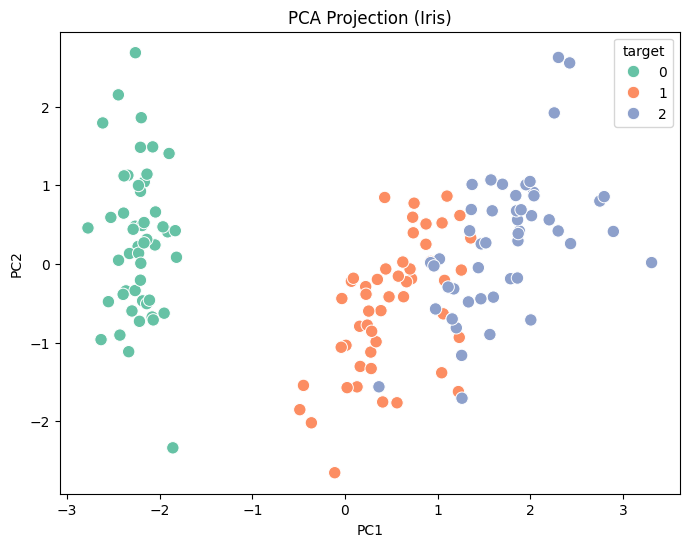

In [4]:
# 4. 시각화
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["target"] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="target", palette="Set2", s=80)
plt.title("PCA Projection (Iris)")
plt.show()

Explained variance ratio: [0.72962445 0.22850762]
누적 설명력: [0.72962445 0.95813207]


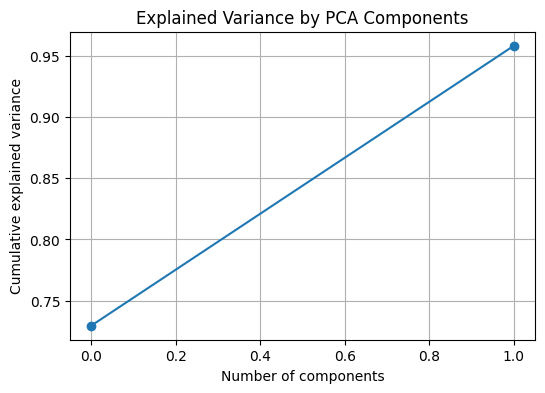

In [5]:
# 5. 분산 설명력 확인
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("누적 설명력:", np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

🔎 Quiz 2: 각 주성분이 전체 분산의 몇 %를 설명하는지 써주세요.

답: PC1은 약 73%, PC2는 약 23%

#### 2. LDA

In [6]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [9]:
# 2. 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 정규화 (LDA는 필수는 아니지만 일반적으로 적용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 3. LDA 적
# LDA는 n_classes - 1 개의 축만 생성 가능합니다. (iris는 3개의 클래스를 가지고 있습니다.)
# 2개의 축으로 설정해주세요.

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_lda.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


🔎 Quiz 3: 왜 LDA는 n_classes - 1개의 축만 생성될까요?

답: LDA의 변환 축 개수는 클래스 평균 벡터들이 만드는 공간의 차원에 의해 제한되며,
이 차원은 최대 n_classes - 1이기 때문에 LDA는 그 이상 축을 만들 수 없습니다.

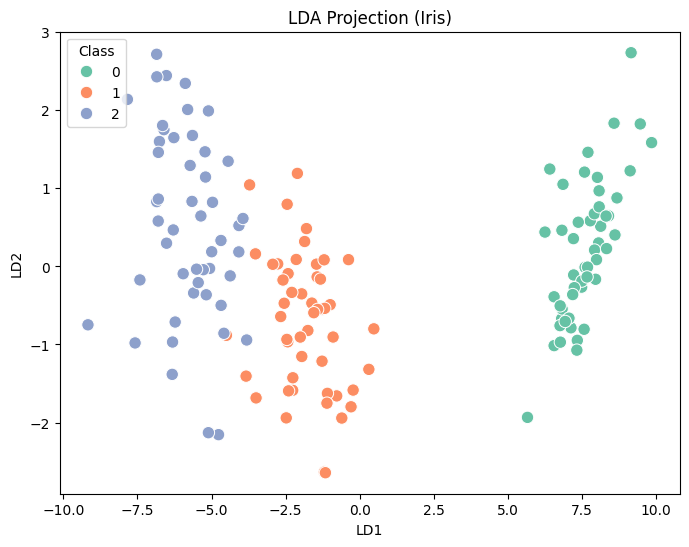

In [11]:
# 4. 시각화
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['target'] = y


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_lda, x='LD1', y='LD2', hue='target', palette='Set2', s=80)
plt.title("LDA Projection (Iris)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title='Class')
plt.show()

#### 3. t-SNE / UMAP

In [12]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap  # pip install umap-learn

/Users/dongwook/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# 2. 데이터 로딩 및 스케일링
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 이전에 사용했던 방식으로 표준화를 진행해주세요.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/dongwook/miniconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/dongwook/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dongwook/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dongwook/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dongwook/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/dongwook/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = 

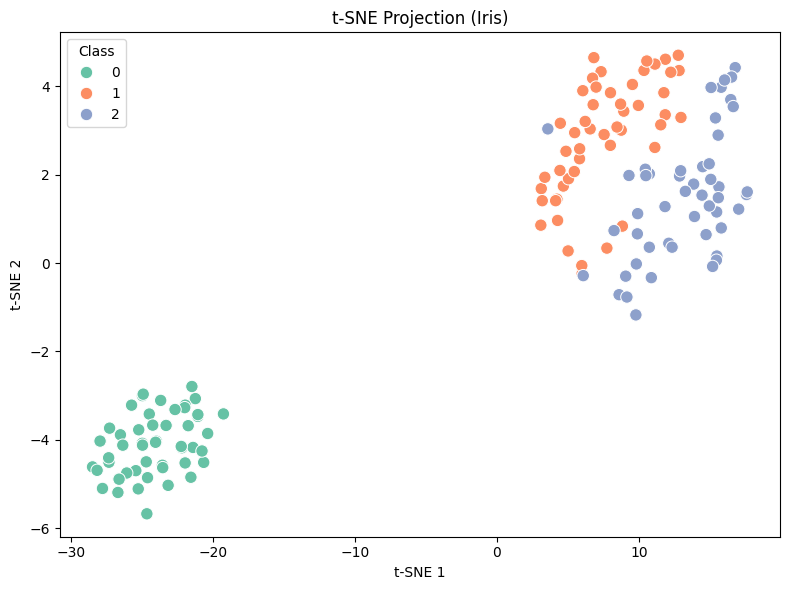

In [15]:
# t-SNE 적용
# 2차원으로 축소해주세요.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# 시각화
df_tsne = pd.DataFrame(X_tsne, columns=["x", "y"])
df_tsne['target'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="target", palette="Set2", s=80)
plt.title("t-SNE Projection (Iris)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()

/Users/dongwook/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


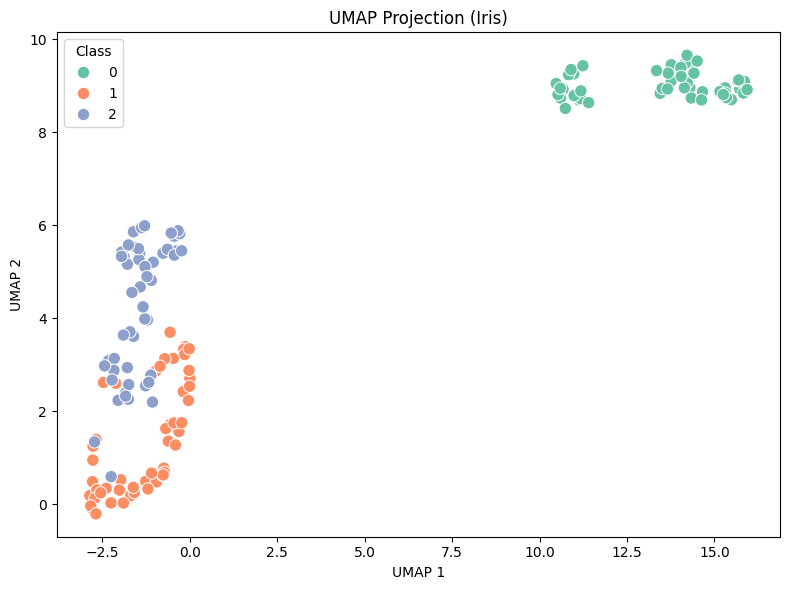

In [17]:
# UMAP 적용
# 2차원으로 축소해주세요.
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 시각화
df_umap = pd.DataFrame(X_umap, columns=["x", "y"])
df_umap['target'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_umap, x="x", y="y", hue="target", palette="Set2", s=80)
plt.title("UMAP Projection (Iris)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title='Class')
plt.tight_layout()
plt.show()

🔎 Quiz 4: 각 기법의 특징과 시각화 결과를 비교해주세요.

답: 
| 기법        | 특징 | 시각화 결과               |
| --------- | ------ | --------------------- |
| **PCA**   | 선형 구조만 반영이 가능하다.   | 데이터의 전반적인 분포를 잘 유지하며 클러스터 간격이 크면 잘 구분된다. |
| **LDA**   | 라벨 정보가 필요하며 최대 축 개수는 클래스수-1 이다.    | 클래스 간 분리가 가장 뚜렷하다. |
| **t-SNE** | 비선형 구조에서 사용 가능하다. | 비슷한 샘플끼리는 뭉쳐서 표현된다. 클러스터 간 거리는 왜곡될 수 있다. |
| **UMAP**  | 고차원 데이터의 지역적, 전역적 구조를 모두 보존한다. | 클러스터 간 관계가 잘 유지된다. |
